In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV


df = pd.read_csv(r'C:\Users\Sahan\Documents\Project_3\CSV\Project_3_data.csv')

df 


,street_name,city,price,bedroom_number,price_per_unit,living_space,land_space,land_space_unit,property_type,Borough,...,"Total retail sales, 2017 ($1,000)","Total transportation and warehousing receipts/revenue, 2017 ($1,000)","Two or More Races, percent","Veteran-owned employer firms, Reference year 2017","Veterans, 2018-2022","White alone, not Hispanic or Latino, percent","White alone, percent","With a disability, under age 65 years, percent, 2018-2022","Women-owned employer firms, Reference year 2017",monthly_payment
0,135th Ave,Queens,749000.0,4.0,832.0,900.0,3924.0,sqft,MULTI_FAMILY,Queens,...,"19,297,120","20,371,315",3.2%,"1,032","38,515",24.0%,46.4%,5.8%,"10,125",4838.101401
1,28 142nd St,Queens,529000.0,3.0,435.0,1216.0,3000.0,sqft,SINGLE_FAMILY,Queens,...,"19,297,120","20,371,315",3.2%,"1,032","38,515",24.0%,46.4%,5.8%,"10,125",3417.030228
2,142nd St,Queens,529000.0,3.0,435.0,1216.0,3000.0,sqft,SINGLE_FAMILY,Queens,...,"19,297,120","20,371,315",3.2%,"1,032","38,515",24.0%,46.4%,5.8%,"10,125",3417.030228
3,11 Inwood Street,Queens,275000.0,3.0,163.0,1680.0,2200.0,sqft,SINGLE_FAMILY,Queens,...,"19,297,120","20,371,315",3.2%,"1,032","38,515",24.0%,46.4%,5.8%,"10,125",1776.338966
4,11 147th Street,Queens,575000.0,2.0,NaN,NaN,2000.0,sqft,SINGLE_FAMILY,Queens,...,"19,297,120","20,371,315",3.2%,"1,032","38,515",24.0%,46.4%,5.8%,"10,125",3714.163292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24446,Lathrop Ave,Staten Island,499900.0,3.0,699.0,715.0,4750.0,sqft,SINGLE_FAMILY,Staten Island,...,"4,302,741","1,091,017",2.4%,S,"11,522",55.4%,70.7%,6.5%,"1,504",3229.061269
24447,W 138th St #5I,Manhattan,330000.0,1.0,440.0,750.0,NaN,NaN,CONDO,Manhattan,...,"54,824,853","4,764,857",3.7%,"2,374","27,778",46.8%,62.9%,6.8%,"18,965",2131.606759
24448,Park Ter E #6,Manhattan,418800.0,1.0,NaN,NaN,NaN,NaN,CONDO,Manhattan,...,"54,824,853","4,764,857",3.7%,"2,374","27,778",46.8%,62.9%,6.8%,"18,965",2705.202759
24449,Park Ter E APT D76,Manhattan,410000.0,1.0,512.0,800.0,NaN,NaN,CONDO,Manhattan,...,"54,824,853","4,764,857",3.7%,"2,374","27,778",46.8%,62.9%,6.8%,"18,965",2648.359912


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24451 entries, 0 to 24450
Data columns (total 75 columns):
 #   Column                                                                                  Non-Null Count  Dtype  
---  ------                                                                                  --------------  -----  
 0   street_name                                                                             24450 non-null  object 
 1   city                                                                                    24451 non-null  object 
 2   price                                                                                   24451 non-null  float64
 3   bedroom_number                                                                          24100 non-null  float64
 4   price_per_unit                                                                          17833 non-null  float64
 5   living_space                                                       

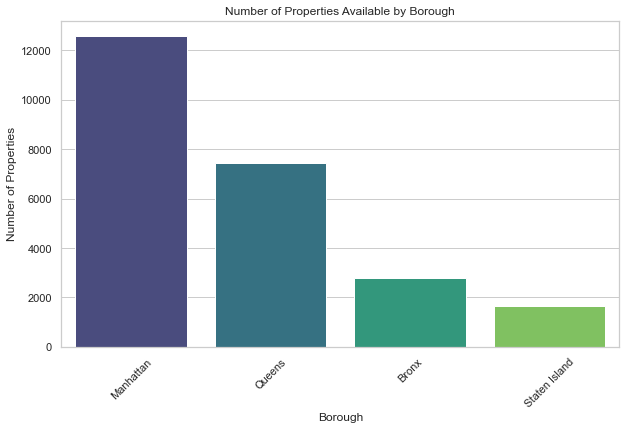

In [4]:
# Set the style of the visualization
sns.set(style='whitegrid')

# Count the number of properties in each borough
borough_counts = df['Borough'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=borough_counts.index, y=borough_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Borough')
plt.ylabel('Number of Properties')
plt.title('Number of Properties Available by Borough')
plt.xticks(rotation=45)
plt.show()


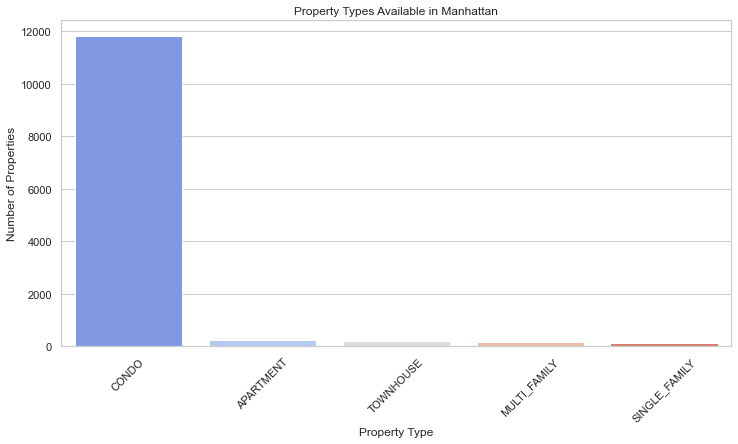

In [5]:
# Filter the DataFrame for Manhattan properties
manhattan_properties = df[df['Borough'] == 'Manhattan']

# Count the number of each property type in Manhattan
property_type_counts = manhattan_properties['property_type'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=property_type_counts.index, y=property_type_counts.values, palette='coolwarm')

# Add labels and title
plt.xlabel('Property Type')
plt.ylabel('Number of Properties')
plt.title('Property Types Available in Manhattan')
plt.xticks(rotation=45)
plt.show()


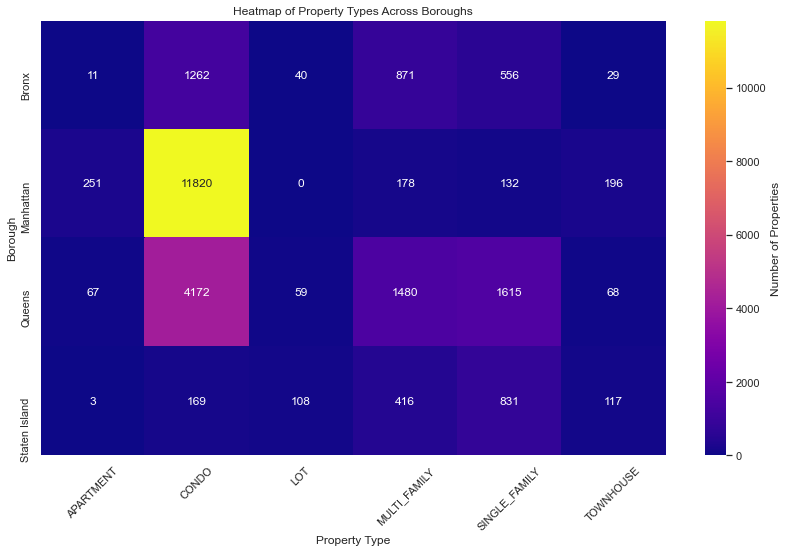

In [9]:
# Create a heatmap with a different color palette
plt.figure(figsize=(14, 8))
sns.heatmap(property_type_pivot, annot=True, fmt='g', cmap='plasma', cbar_kws={'label': 'Number of Properties'})

# Add labels and title
plt.title('Heatmap of Property Types Across Boroughs')
plt.xlabel('Property Type')
plt.ylabel('Borough')
plt.xticks(rotation=45)
plt.show()


In [10]:
# Load Brooklyn DataFrame
brooklyn_df = pd.read_csv(r'C:\Users\Sahan\Documents\Project_3\CSV\brooklyn_df.csv')

# Check the structure of the new DataFrame
print(brooklyn_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9901 entries, 0 to 9900
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             9901 non-null   object 
 1   state            9901 non-null   object 
 2   price            9901 non-null   float64
 3   bedroom_number   9341 non-null   float64
 4   bathroom_number  9820 non-null   float64
 5   price_per_unit   8603 non-null   float64
dtypes: float64(4), object(2)
memory usage: 464.2+ KB
None


In [12]:
# Update the required columns based on the actual names in brooklyn_df
# Example: Adjust according to the actual column names
# Let's say the correct names are:
# 'Street Name', 'City', 'Price', 'Bedroom Number', 'Monthly Payment', 
# 'Property Type', 'Borough', 'Median Household Income'

required_columns = ['Street Name', 'City', 'Price', 'Bedroom Number', 
                    'Monthly Payment', 'Property Type', 'Borough', 
                    'Median Household Income']

# Filter the brooklyn_df to only include these columns
brooklyn_df = brooklyn_df[required_columns]

# Set the 'Borough' column to 'Brooklyn'
brooklyn_df['Borough'] = 'Brooklyn'

# Concatenate the two DataFrames
combined_df = pd.concat([nu_df, brooklyn_df], ignore_index=True)

# Save the combined DataFrame
combined_df.to_csv(r'C:\Users\Sahan\Documents\Project_3\CSV\combined_df.csv', index=False)


KeyError: "None of [Index(['Street Name', 'City', 'Price', 'Bedroom Number', 'Monthly Payment',\n       'Property Type', 'Borough', 'Median Household Income'],\n      dtype='object')] are in the [columns]"